# SVM中使用多项式特征（处理非线性的问题）

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
from sklearn import datasets
x, y = datasets.make_moons() ##自动生成数据集

In [9]:
x.shape


(100, 2)

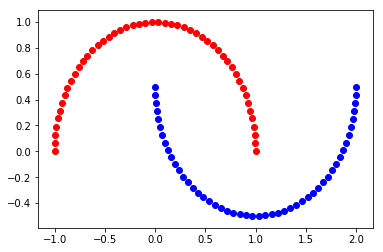

In [10]:
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

In [13]:
x, y = datasets.make_moons(noise=0.15)  ## 给数据产生噪音

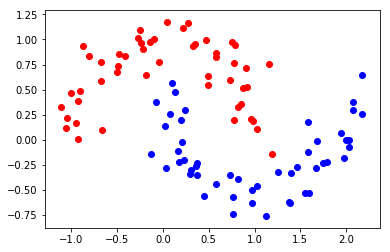

In [14]:
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

# 使用多项式的SVM

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('linearSVC',LinearSVC(C=C))
    ]
    )

In [30]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(x, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [31]:
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)) ,
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


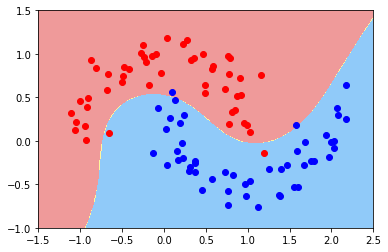

In [32]:
plot_decision_boundary(poly_svc,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

# 使用多项式核函数的SVM

In [35]:
from  sklearn.svm import SVC
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('kernelSVC',SVC(kernel="poly", degree=degree,C=C)) 
    ]
    )

In [38]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(x,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


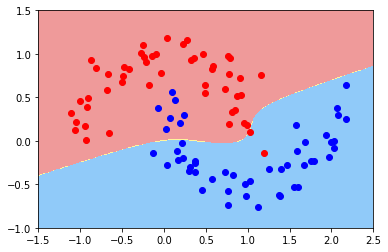

In [39]:
plot_decision_boundary(poly_kernel_svc,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()